# W207 Final Project: Forest Cover Prediction 
#### - Adara Liao, Apik Zorian, Chandra Shekar Bikkanur, Tejenderpal Singh

In this project, we will use data from Kaggle's Forest Cover Type competition to predict a type of forest cover using cartographic variables. There are 7 different cover types and once trained, our model should be able to make an accurate prediction on the cover type given a new data point. 

We will begin by analizing the data given to us. We will utilize exploratory data analysis to investigate nuances in our training features and make observations on different trends we see. We will then choose a few different supervised machine learning models to train on this data and inspect our accuracies. 

Once we have chosen a model we feel has a strong accuracy and makes sense to use for our objective, we will begin to study how we can improve upon it. This will involve playing with the hyperparameters, as well as diving into the features themselves. We may experiment with feature reduction techniques, regularization, and even feature engineering. With these experiments, we will track how our model predicts and eventually test our accuracy on Kaggle's test data.


In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for plotting
import seaborn as sns; sns.set() # for plotting 
import warnings
warnings.filterwarnings("ignore") # To ignore warning messages while executing the code.
# Data preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Imputer
from sklearn.decomposition import PCA
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.pipeline import Pipeline

# SK-learn libraries for learning.
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVR
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import VotingClassifier

# SK-learn libraries for evaluation.
from sklearn import metrics 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [2]:
data = pd.read_csv("train.csv") # Load train data 
test_data = pd.read_csv("test.csv") # Load test data 
print('Forest train data shape: {}'.format(data.shape))
print('Forest test data shape: {}'.format(test_data.shape))

Forest train data shape: (15120, 56)
Forest test data shape: (565892, 55)


In [3]:
data['Hillshade_Mean'] =  (data['Hillshade_9am'] + data['Hillshade_Noon']  + data['Hillshade_3pm']) * (1/3) 

In [4]:
data['Distance_To_Hydrology'] =  np.sqrt(data['Horizontal_Distance_To_Hydrology'] **2 + data['Vertical_Distance_To_Hydrology'] **2 )

In [5]:
data.info() # Info regarding dataType, number of entries and null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15120 entries, 0 to 15119
Data columns (total 58 columns):
Id                                    15120 non-null int64
Elevation                             15120 non-null int64
Aspect                                15120 non-null int64
Slope                                 15120 non-null int64
Horizontal_Distance_To_Hydrology      15120 non-null int64
Vertical_Distance_To_Hydrology        15120 non-null int64
Horizontal_Distance_To_Roadways       15120 non-null int64
Hillshade_9am                         15120 non-null int64
Hillshade_Noon                        15120 non-null int64
Hillshade_3pm                         15120 non-null int64
Horizontal_Distance_To_Fire_Points    15120 non-null int64
Wilderness_Area1                      15120 non-null int64
Wilderness_Area2                      15120 non-null int64
Wilderness_Area3                      15120 non-null int64
Wilderness_Area4                      15120 non-null int64
Soil_T

In [6]:
data.describe().T # To know the descriptive statistical info of the features

,count,mean,std,min,25%,50%,75%,max
Id,15120.0,7560.500000,4364.912370,1.000000,3780.750000,7560.500000,11340.250000,15120.000000
Elevation,15120.0,2749.322553,417.678187,1863.000000,2376.000000,2752.000000,3104.000000,3849.000000
Aspect,15120.0,156.676653,110.085801,0.000000,65.000000,126.000000,261.000000,360.000000
Slope,15120.0,16.501587,8.453927,0.000000,10.000000,15.000000,22.000000,52.000000
Horizontal_Distance_To_Hydrology,15120.0,227.195701,210.075296,0.000000,67.000000,180.000000,330.000000,1343.000000
Vertical_Distance_To_Hydrology,15120.0,51.076521,61.239406,-146.000000,5.000000,32.000000,79.000000,554.000000
Horizontal_Distance_To_Roadways,15120.0,1714.023214,1325.066358,0.000000,764.000000,1316.000000,2270.000000,6890.000000
Hillshade_9am,15120.0,212.704299,30.561287,0.000000,196.000000,220.000000,235.000000,254.000000
Hillshade_Noon,15120.0,218.965608,22.801966,99.000000,207.000000,223.000000,235.000000,254.000000
Hillshade_3pm,15120.0,135.091997,45.895189,0.000000,106.000000,138.000000,167.000000,248.000000


In [7]:
data.head(3).T # To see first 5 records of all the features

,0,1,2
Id,1.000000,2.000000,3.000000
Elevation,2596.000000,2590.000000,2804.000000
Aspect,51.000000,56.000000,139.000000
Slope,3.000000,2.000000,9.000000
Horizontal_Distance_To_Hydrology,258.000000,212.000000,268.000000
Vertical_Distance_To_Hydrology,0.000000,-6.000000,65.000000
Horizontal_Distance_To_Roadways,510.000000,390.000000,3180.000000
Hillshade_9am,221.000000,220.000000,234.000000
Hillshade_Noon,232.000000,235.000000,238.000000
Hillshade_3pm,148.000000,151.000000,135.000000


[Text(0, 0.5, 'frequency'), Text(0.5, 0, 'cover types')]

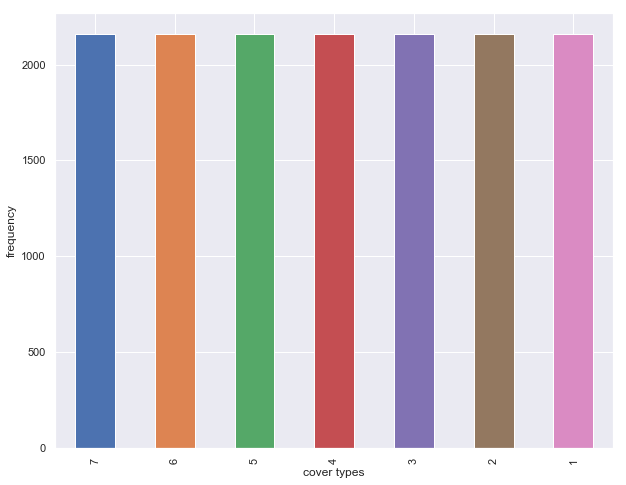

In [8]:
coversType = data['Cover_Type']
fig_std=(10,8)
width = 0.4
coversType.value_counts().plot(kind='bar', figsize=fig_std).set(xlabel='cover types', ylabel='frequency') # To see the distribution of cover types in the data

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002562DCEB4A8>,
      dtype=object)

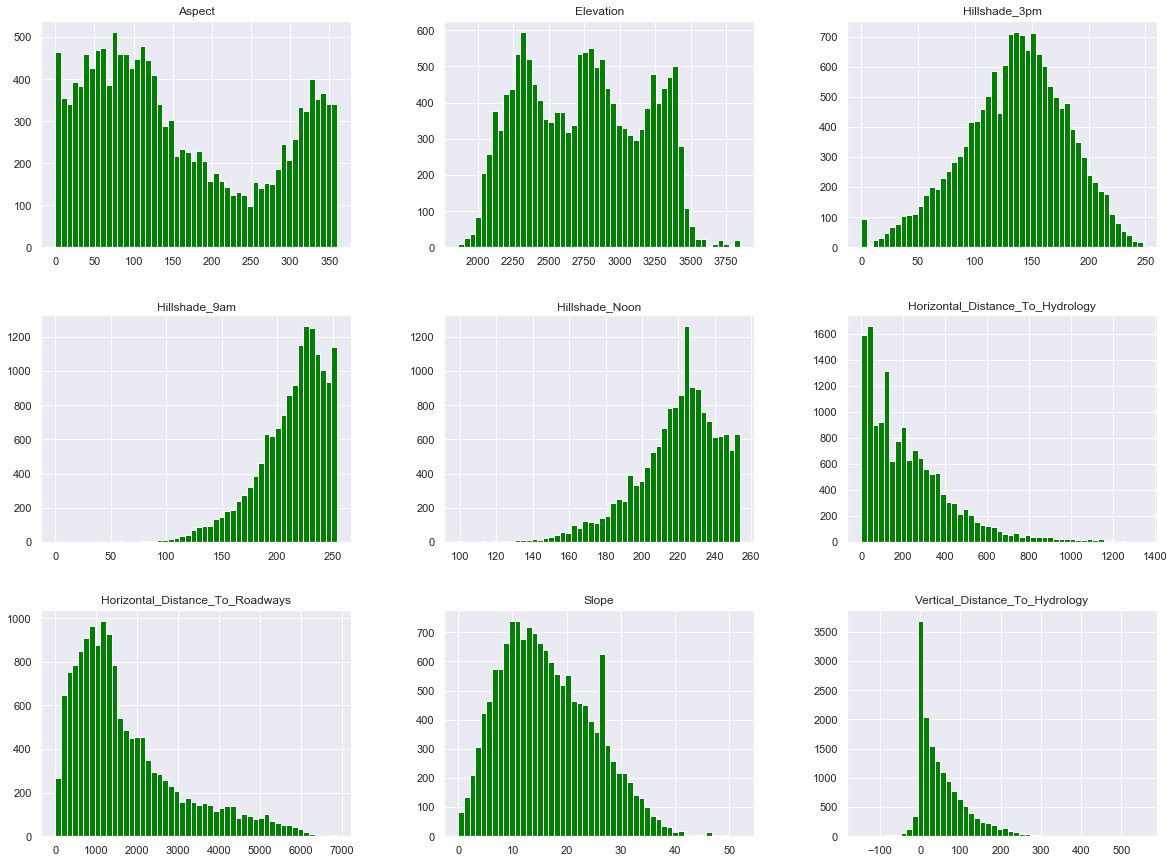

In [9]:
data.loc[:, 'Elevation': 'Hillshade_3pm'].hist(bins=50, figsize=(20,15), color = 'green') # Histograms to see the distribution of different features in the given data

In [10]:
Labels = ['Spruce/Fir', 'Lodgepole Pine', 'Ponderosa Pine', 'Cottonwood/Willow', 'Aspen', 'Douglas-fir', 'Krummholz']
# Function to plot Histogram of a 'feature' in the entire data ('df') including 'label' specific histogram
def plotFeatureHistogram(df, feature, labels):    
    fig = plt.figure(figsize=(20,10))
    fig.subplots_adjust(hspace=0.4, wspace=0.4)
    for i in range(1,9):        
        ax = fig.add_subplot(2, 4, i)
        feature_data = df[feature]
        if i == 1:
           ax.hist(feature_data, color='green', bins = 'fd', range=[feature_data.min(), feature_data.max()]) 
           ax.set_title(feature + ': Total ', fontsize = 17) 
        else:    
            ax.hist(feature_data[df['Cover_Type'] == i-1], bins = 'fd', range=[feature_data.min(), feature_data.max()])        
            ax.set_title(feature + ': ' + labels[i-2], fontsize = 17)
    return None  

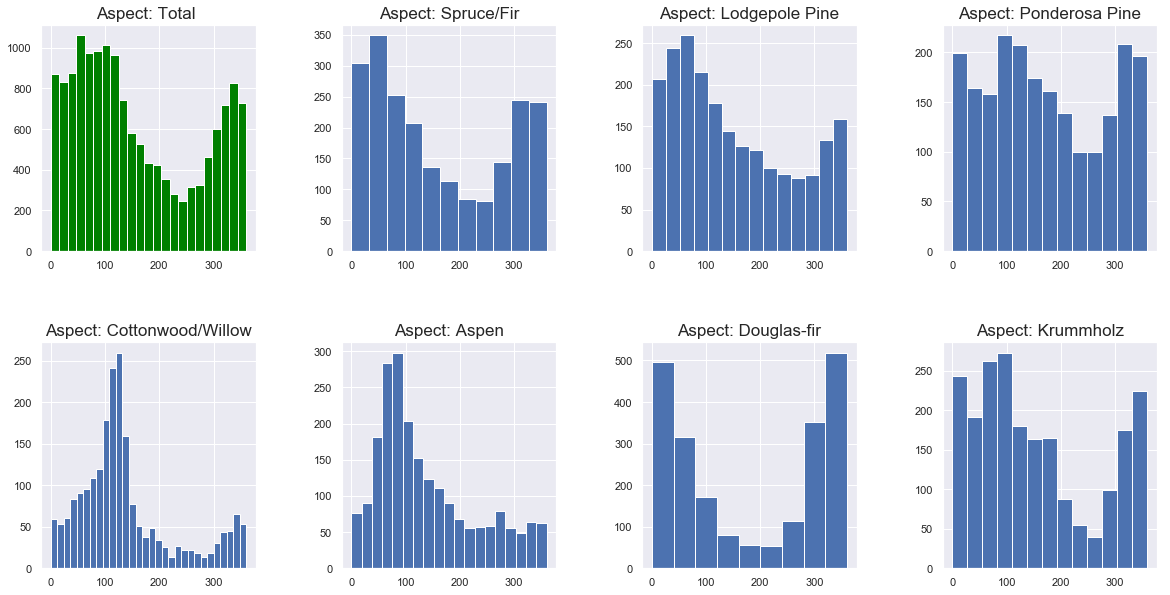

In [11]:
plotFeatureHistogram(data, 'Aspect', Labels)

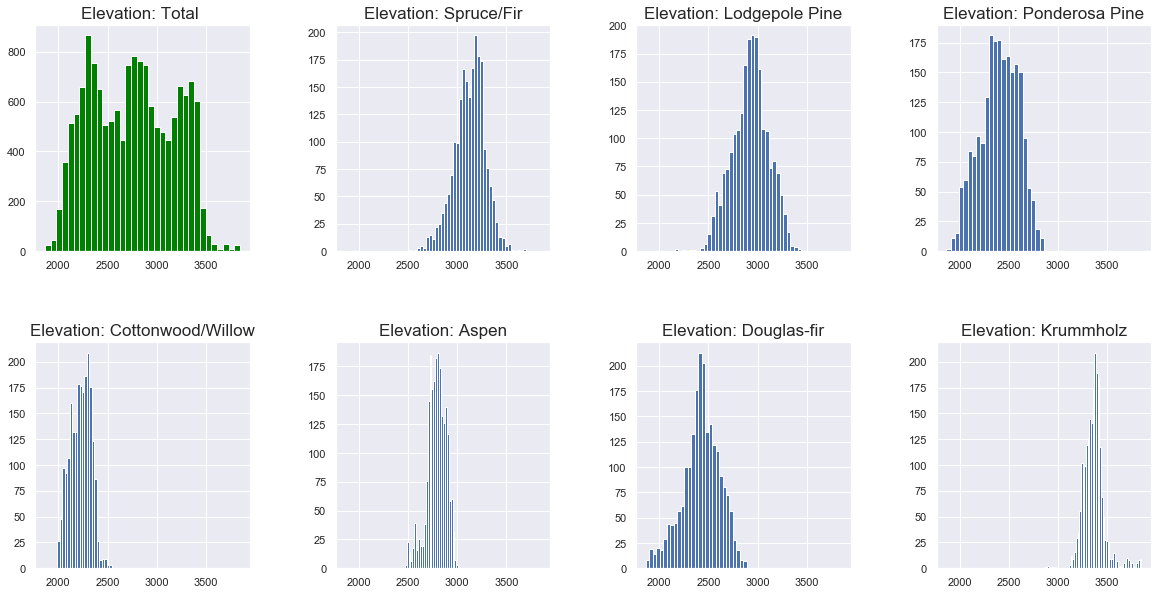

In [12]:
plotFeatureHistogram(data, 'Elevation', Labels)

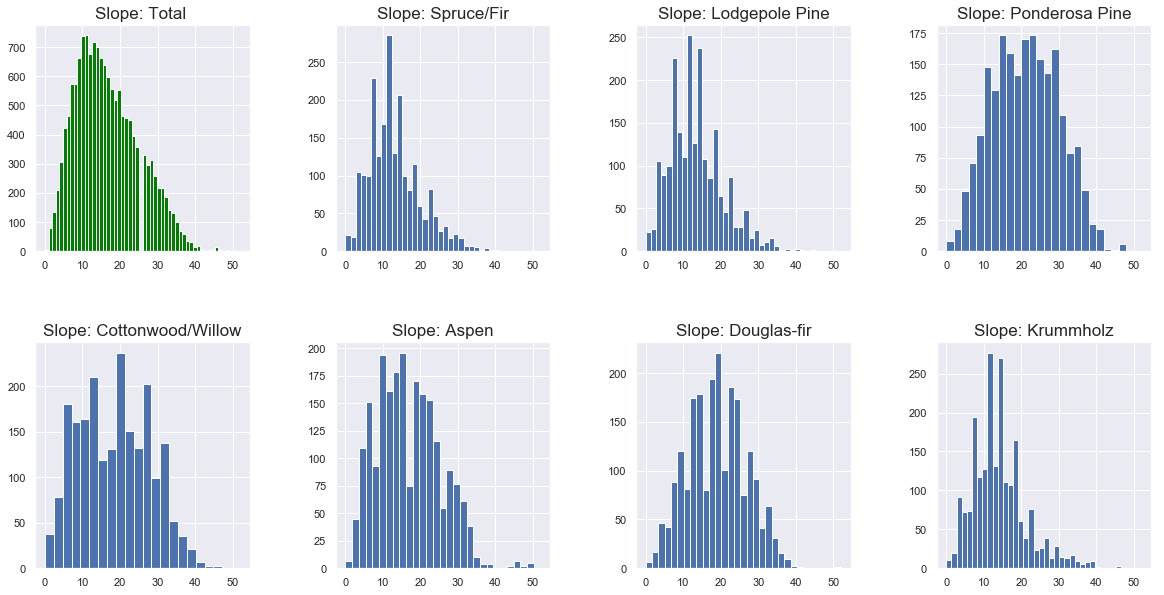

In [13]:
plotFeatureHistogram(data, 'Slope', Labels)

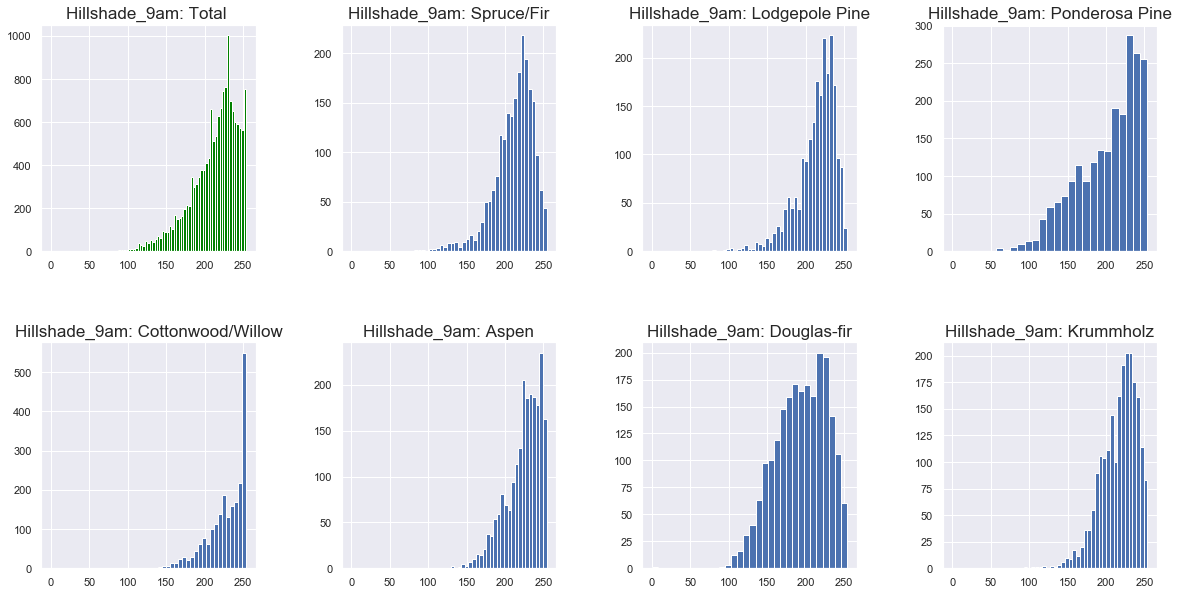

In [14]:
plotFeatureHistogram(data, 'Hillshade_9am', Labels)

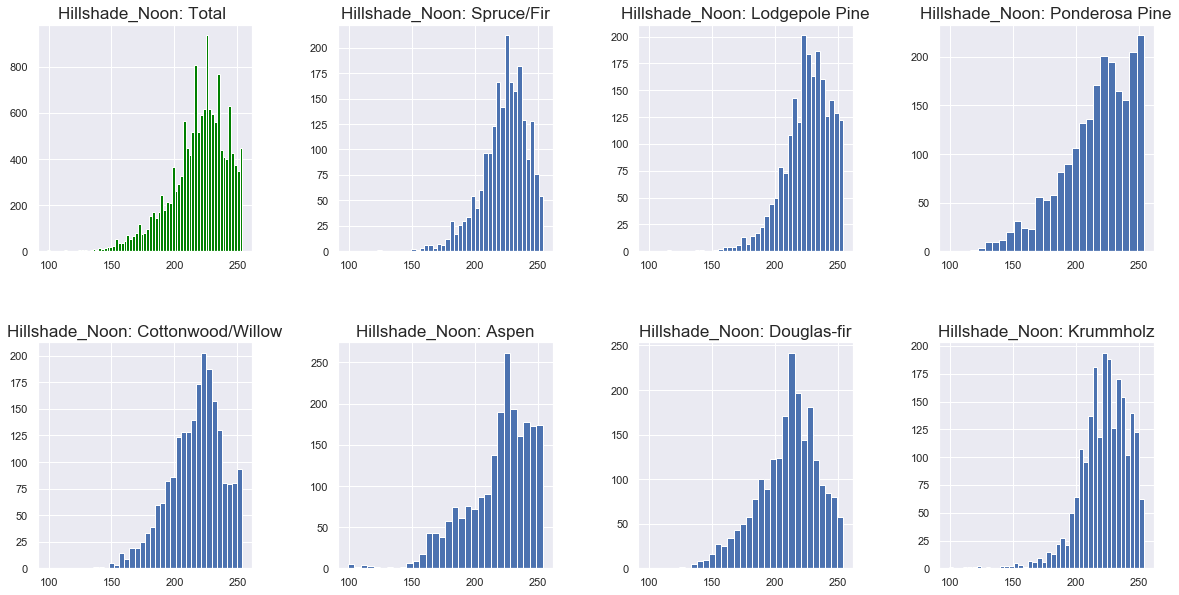

In [15]:
plotFeatureHistogram(data, 'Hillshade_Noon', Labels)

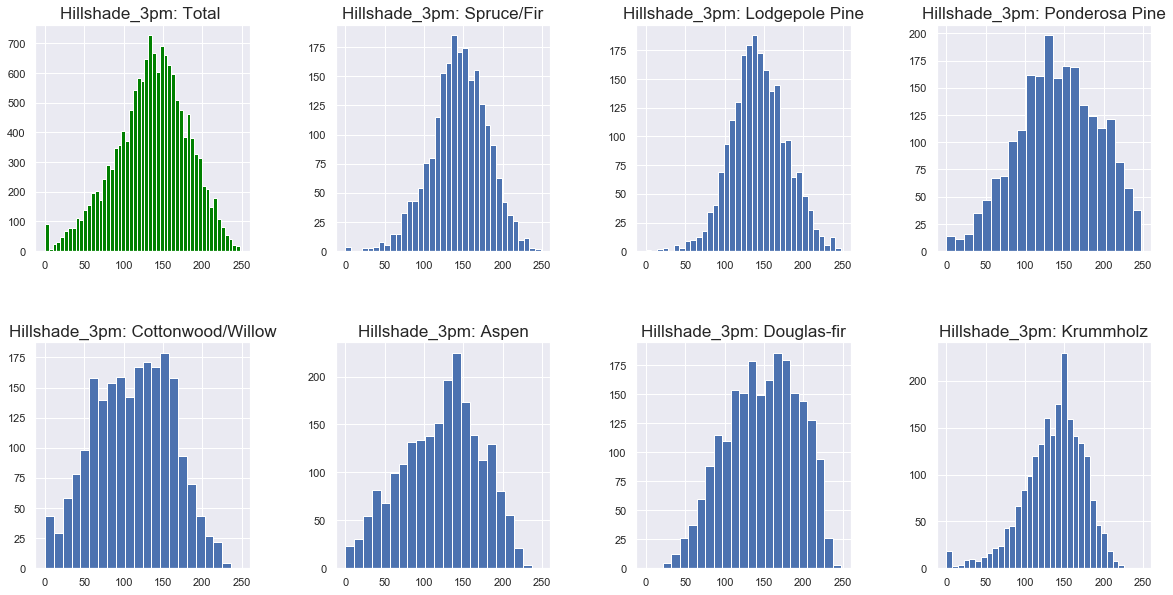

In [16]:
plotFeatureHistogram(data, 'Hillshade_3pm', Labels)

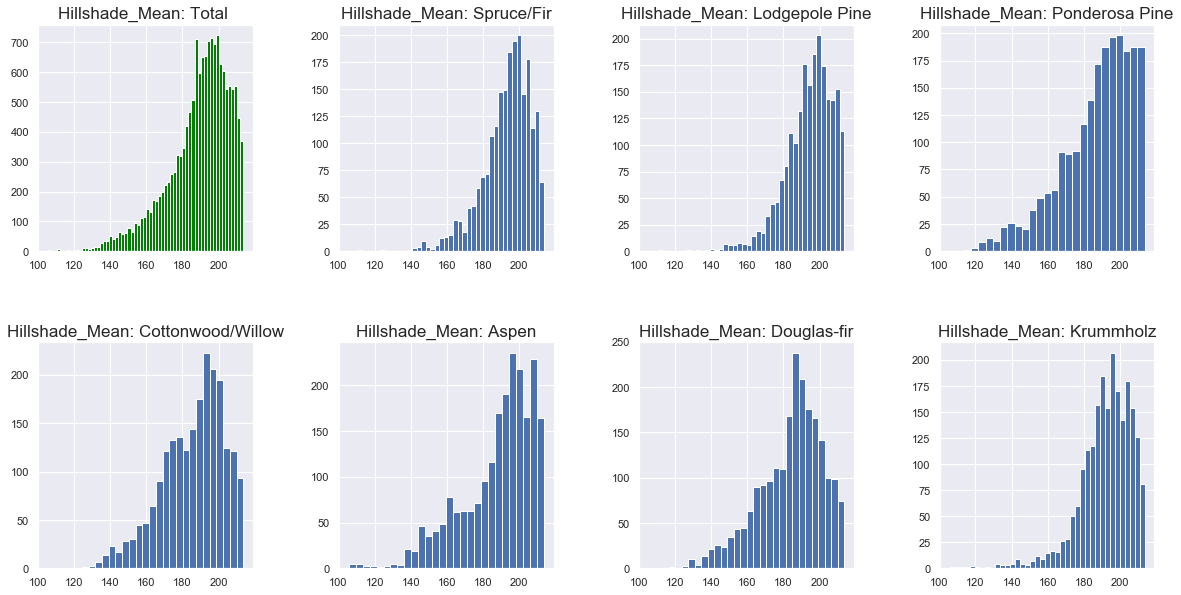

In [19]:
plotFeatureHistogram(data, 'Hillshade_Mean', Labels)

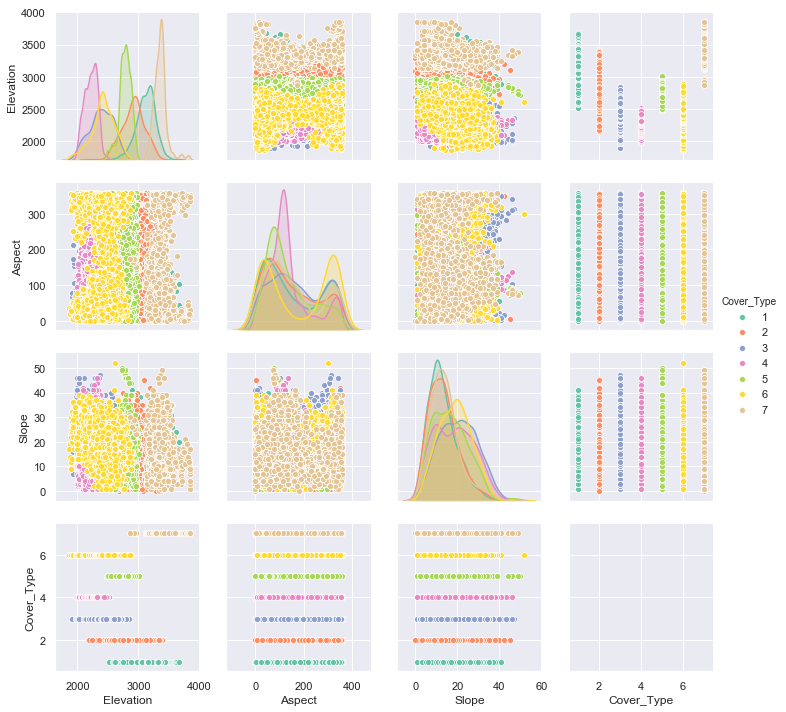

In [20]:
Quant_data = data.loc[:, 'Elevation': 'Slope']
Quant_data['Cover_Type'] = data['Cover_Type']
sns.pairplot(Quant_data, kind="scatter", hue="Cover_Type",  palette="Set2")
plt.show()

In [21]:
X, y = data.drop(["Id","Cover_Type"], axis = 1), data["Cover_Type"] # Seperating features (X) and labels (y). 'Id' is not a feature, so removed.

print(X.shape, y.shape)


(15120, 56) (15120,)


In [22]:
pipeline1 = Pipeline([('imputer', Imputer(strategy="median")),('std_scaler', StandardScaler())])
#X.loc[:,'Elevation': 'Horizontal_Distance_To_Fire_Points'] = pipeline1.fit_transform(X.loc[:,'Elevation': 'Horizontal_Distance_To_Fire_Points'])


C:\Users\chand\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [23]:
#pipeline2 = Pipeline([('PCA', PCA())])
X_preproc = pipeline1.fit_transform(X)
print(X_preproc.shape)


(15120, 56)


No handles with labels found to put in legend.


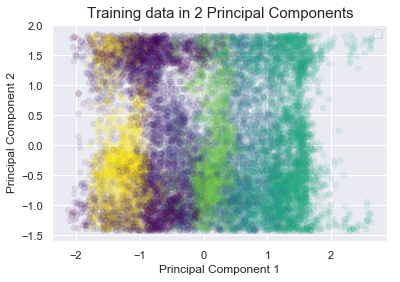

In [24]:
    Labels = ['Spruce/Fir', 'Lodgepole Pine', 'Ponderosa Pine', 'Cottonwood/Willow', 'Aspen', 'Douglas-fir', 'Krummholz']
    color = np.random.rand(8)
    colors = [color[i] for i in y]
    plt.scatter(X_preproc[:,0], X_preproc[:,1], alpha = 0.1,  c=colors, linewidths=0.5, cmap='viridis')  
     #plt.scatter(X_preproc[y == 2,0], X_preproc[y == 2,1], color = 'red', alpha = 0.3, label = Labels[1])   
    plt.xlabel('Principal Component 1', fontsize = 12)
    plt.ylabel('Principal Component 2', fontsize = 12)
    plt.legend(loc='best', shadow=False, scatterpoints=1)
    plt.title('Training data in 2 Principal Components', fontsize = 15)
    plt.show()
    


In [25]:
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.20, random_state=42)
for train_index, test_index in sss.split(X_preproc, y):
    train_data, dev_data = X_preproc[train_index], X_preproc[test_index]
    train_labels, dev_labels =  y[train_index], y[test_index]
   

In [26]:
#train_data, dev_data, train_labels, dev_labels = train_test_split(X_preproc, y, test_size=0.2, random_state=42)
print('train_data shape: ',train_data.shape)
print('train_labels shape: ',train_labels.shape)
print('dev_data shape: ',dev_data.shape)
print('dev_labels shape: ',dev_labels.shape)

train_data shape:  (12096, 56)
train_labels shape:  (12096,)
dev_data shape:  (3024, 56)
dev_labels shape:  (3024,)


In [27]:
    knn = KNeighborsClassifier() # Assigning KNeighborsClassifier Class to a variable
    knn.fit(train_data, train_labels) # Fitting the train data to the classifier    
    print('Accuracy of KNN Classifier on train data: {}'.format(knn.score(train_data, train_labels)))
    print('Accuracy of KNN Classifier on dev data: {}'.format(knn.score(dev_data, dev_labels)))  
#     knn_clf_search = GridSearchCV(knn, {'n_neighbors': [x for x in range(5,100,5)]}) # Assiging the GridSearchCV Class (with 'k' values= 5,10,15,..95) 
#     knn_clf_search.fit(train_data, train_labels) # Fitting the tain_data and train_labels to the GridSearch   
#     print("The best 'k' value for KNN Classifier is: {} \n The best score is: {} \n\n".format(knn_clf_search.best_params_, knn_clf_search.best_score_) )

Accuracy of KNN Classifier on train data: 0.8551587301587301
Accuracy of KNN Classifier on dev data: 0.7671957671957672


In [28]:
    gnb = GaussianNB() # Assigning KNeighborsClassifier Class to a variable
    gnb.fit(train_data, train_labels) # Fitting the train data to the classifier    
    print('Accuracy of Gaussian NB Classifier on train data: {}'.format(gnb.score(train_data, train_labels)))
    print('Accuracy of Gaussian NB Classifier on dev data: {}'.format(gnb.score(dev_data, dev_labels)))  
   

Accuracy of Gaussian NB Classifier on train data: 0.45866402116402116
Accuracy of Gaussian NB Classifier on dev data: 0.4497354497354497


In [29]:
    bnb = BernoulliNB() # Assigning KNeighborsClassifier Class to a variable
    bnb.fit(train_data, train_labels) # Fitting the train data to the classifier    
    print('Accuracy of Bernoulli NB Classifier on train data: {}'.format(bnb.score(train_data, train_labels)))
    print('Accuracy of Bernoulli NB Classifier on dev data: {}'.format(bnb.score(dev_data, dev_labels)))  

Accuracy of Bernoulli NB Classifier on train data: 0.6180555555555556
Accuracy of Bernoulli NB Classifier on dev data: 0.611441798941799


In [46]:
    LogisticReg_clf =  LogisticRegression(penalty='l2', solver='lbfgs') # Assigning LogisticRegression Class to a variable
    LogisticReg_clf.fit(train_data, train_labels) # Fitting the train data to the classifier   
    print('Accuracy of Logistic Regression Classifier on train data:{}'.format(LogisticReg_clf.score(train_data, train_labels)))
    print('Accuracy of Logistic Regression Classifier on dev data:{}'.format(LogisticReg_clf.score(dev_data, dev_labels)))
#     LogisticReg_clf_search = GridSearchCV(LogisticReg_clf, {'C': [0.5, 1.0, 2.0, 10.0]}) # Assiging the GridSearchCV Class (with 'k' values= 5,10,15,..95) 
#     LogisticReg_clf_search.fit(train_data, train_labels) # Fitting the tain_data and train_labels to the GridSearch   
#     print("The best 'C' value for Logistic Regression Classifier is: {} \n The best score is: {} \n\n".format(LogisticReg_clf_search.best_params_, LogisticReg_clf_search.best_score_) )

Accuracy of Logistic Regression Classifier on train data:0.6821263227513228
Accuracy of Logistic Regression Classifier on dev data:0.6703042328042328


In [31]:
    svm_clf =  SVC(kernel="rbf", gamma=.05, C=200) # Assigning LogisticRegression Class to a variable
    svm_clf.fit(train_data, train_labels) # Fitting the train data to the classifier   
    print('Accuracy of Logistic Regression Classifier on train data:{}'.format(svm_clf.score(train_data, train_labels)))
    print('Accuracy of Logistic Regression Classifier on dev data:{}'.format(svm_clf.score(dev_data, dev_labels)))

Accuracy of Logistic Regression Classifier on train data:0.9519675925925926
Accuracy of Logistic Regression Classifier on dev data:0.8389550264550265


In [32]:
    LinearSVC_clf =  LinearSVC(C=10, loss="hinge") # Assigning LogisticRegression Class to a variable
    LinearSVC_clf.fit(train_data, train_labels) # Fitting the train data to the classifier   
    print('Accuracy of Logistic Regression Classifier on train data:{}'.format(LinearSVC_clf.score(train_data, train_labels)))
    print('Accuracy of Logistic Regression Classifier on dev data:{}'.format(LinearSVC_clf.score(dev_data, dev_labels)))

Accuracy of Logistic Regression Classifier on train data:0.6521164021164021
Accuracy of Logistic Regression Classifier on dev data:0.6415343915343915


In [33]:
    RF = RandomForestClassifier(random_state=0, n_estimators=100)
    RF.fit(train_data, train_labels) # Fitting the train data to the classifier 
    print('Accuracy of Random Forest Classifier on train data: {}'.format(RF.score(train_data, train_labels)))
    print('Accuracy of Random Forest Classifier on dev data: {}'.format(RF.score(dev_data, dev_labels)))
#     #Grid search for the optimal 'params'
#     RF_clf_search = GridSearchCV(RF, {'max_depth': [x for x in range(1, 5)], 'n_estimators': [x for x in range(10, 200, 50)] }) # Assiging the GridSearchCV Class (with 'k' values= 5,10,15,..95) 
#     RF_clf_search.fit(train_data, train_labels) # Fitting the tain_data and train_labels to the GridSearch
#     print("The best 'params' for Random Forest Classifier are: {} \n The best score is: {} \n\n".format(RF_clf_search.best_params_, RF_clf_search.best_score_) )

Accuracy of Random Forest Classifier on train data: 1.0
Accuracy of Random Forest Classifier on dev data: 0.8485449735449735


In [34]:
    DT = DecisionTreeClassifier(random_state=0)
    DT.fit(train_data, train_labels) # Fitting the train data to the classifier 
    print('Accuracy of Random Forest Classifier on train data: {}'.format(DT.score(train_data, train_labels)))
    print('Accuracy of Random Forest Classifier on dev data: {}'.format(DT.score(dev_data, dev_labels)))

Accuracy of Random Forest Classifier on train data: 1.0
Accuracy of Random Forest Classifier on dev data: 0.7764550264550265


In [35]:
    ada_clf = AdaBoostClassifier(DecisionTreeClassifier(), n_estimators=100, algorithm="SAMME", learning_rate=0.5)
    ada_clf.fit(train_data, train_labels) # Fitting the train data to the classifier 
    print('Accuracy of Random Forest Classifier on train data: {}'.format(ada_clf.score(train_data, train_labels)))
    print('Accuracy of Random Forest Classifier on dev data: {}'.format(ada_clf.score(dev_data, dev_labels)))

Accuracy of Random Forest Classifier on train data: 1.0
Accuracy of Random Forest Classifier on dev data: 0.7754629629629629


In [36]:
    GBC = GradientBoostingClassifier(random_state=0, n_estimators=300)
    GBC.fit(train_data, train_labels) # Fitting the train data to the classifier 
    print('Accuracy of Random Forest Classifier on train data: {}'.format(GBC.score(train_data, train_labels)))
    print('Accuracy of Random Forest Classifier on dev data: {}'.format(GBC.score(dev_data, dev_labels)))

Accuracy of Random Forest Classifier on train data: 0.9211309523809523
Accuracy of Random Forest Classifier on dev data: 0.8207671957671958


In [37]:
    ExtrTree_clf = ExtraTreesClassifier(max_features=0.9, n_estimators=200)
    ExtrTree_clf.fit(train_data, train_labels) # Fitting the train data to the classifier 
    print('Accuracy of Random Forest Classifier on train data: {}'.format(ExtrTree_clf.score(train_data, train_labels)))
    print('Accuracy of Random Forest Classifier on dev data: {}'.format(ExtrTree_clf.score(dev_data, dev_labels)))

Accuracy of Random Forest Classifier on train data: 1.0
Accuracy of Random Forest Classifier on dev data: 0.8703703703703703


In [38]:
MLPclf = MLPClassifier(hidden_layer_sizes=(55,250,250,55) ) # hidden_layer_sizes=(100, ), activation=’relu’, solver=’adam’, alpha=0.0001, batch_size=’auto’, learning_rate=’constant’, learning_rate_init=0.001, power_t=0.5, max_iter=200, shuffle=True, random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True, early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08, n_iter_no_change=10)
MLPclf.fit(train_data, train_labels)  
print('Accuracy of MLP Classifier on train data: {}'.format(MLPclf.score(train_data, train_labels)))
print('Accuracy of MLP Classifier on dev data: {}'.format(MLPclf.score(dev_data, dev_labels)))

Accuracy of MLP Classifier on train data: 0.9892526455026455
Accuracy of MLP Classifier on dev data: 0.8634259259259259


In [39]:
#voting_clf = VotingClassifier(estimators=[ ('knn', knn), ('gnb', gnb), ('bnb', bnb), ('LogisticReg_clf', LogisticReg_clf),('svm_clf', svm_clf), ('LinearSVC_clf', LinearSVC_clf),   ('rf', RF), ('DT', DT),('ada_clf', ada_clf), ('GBC', GBC),('ExtrTree_clf', ExtrTree_clf),  ('MLPclf', MLPclf),], voting='hard')
voting_clf = VotingClassifier(estimators=[('svm_clf', svm_clf), ('rf', RF), ('ExtrTree_clf', ExtrTree_clf),  ('MLPclf', MLPclf),], voting='hard')
voting_clf.fit(train_data, train_labels)
print('Accuracy of Voting Classifier on train data: {}'.format(voting_clf.score(train_data, train_labels)))
print('Accuracy of Voting Classifier on dev data: {}'.format(voting_clf.score(dev_data, dev_labels)))

Accuracy of Voting Classifier on train data: 0.9982638888888888
Accuracy of Voting Classifier on dev data: 0.8697089947089947


In [40]:
# test_data_preproc = test_data.drop(['Id'], axis=1)
# test_data_preproc.loc[:,'Elevation': 'Horizontal_Distance_To_Fire_Points'] = pipeline1.transform(test_data_preproc.loc[:,'Elevation': 'Horizontal_Distance_To_Fire_Points'])
# test_data_preproc = pipeline2.transform(test_data_preproc)
# predict = voting_clf.predict(test_data_preproc)

In [41]:
test_data_preproc = test_data.drop(['Id'], axis=1)
test_data_preproc['Hillshade_Mean'] =  (test_data_preproc['Hillshade_9am'] + test_data_preproc['Hillshade_Noon']  + test_data_preproc['Hillshade_3pm']) * (1/3) 
test_data_preproc['Distance_To_Hydrology'] =  np.sqrt(test_data_preproc['Horizontal_Distance_To_Hydrology'] **2 + test_data_preproc['Vertical_Distance_To_Hydrology'] **2 )
test_data_preproc = pipeline1.transform(test_data_preproc)
predict = voting_clf.predict(test_data_preproc)

In [42]:
# predict = ExtrTree_clf.predict(test_data_preproc)

In [43]:
print(predict[1000:1300])

[1 1 1 1 1 1 1 1 2 1 1 2 1 1 1 1 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 2 1 2 2 2 2
 2 2 2 2 2 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 1 1 2 2 2 1 5 5 2 2 2 2 2 5 5 2 2 2 2 2 2 2 2 2 5 5 5 5 5 2 2 2 2 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 2 2 2 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2
 2 1 2 1 1 1 2 2 2 2 2 2 2 2 2 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 2 5 5 5 5 5 5 5 5 5 5 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 1 2 1 1 5 5 5 2 2 2 2 2 5
 5 5 2 2]


In [44]:
submission = pd.DataFrame({'Id': test_data.Id, 'Cover_Type': predict})
submission.to_csv('submission.csv', index=False)